# Ładowanie danych

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import os
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from tqdm import tqdm_notebook as tqdm
# ------------------------------------------------------------
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

TRAIN_DATA_FILE_PATH = "data/artificial_train.data"
TRAIN_LABELS_FILE_PATH = "data/artificial_train.labels"
VALID_DATA_FILE_PATH = "data/artificial_valid.data"

x_df = pd.read_csv(TRAIN_DATA_FILE_PATH,
                   header=None,
                   sep=" ",
                   usecols=range(500))
x = x_df.values

y_df = pd.read_csv(TRAIN_LABELS_FILE_PATH, header=None)
y = y_df.values.ravel()

x_df_val = pd.read_csv(VALID_DATA_FILE_PATH,
                       header=None,
                       sep=" ",
                       usecols=range(500))
x_val = x_df_val.values

# Mierzenie korealacji

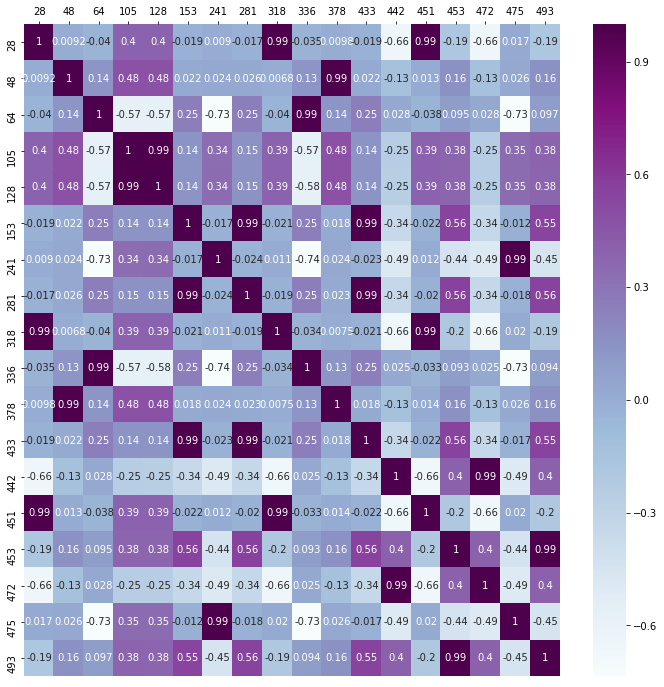

In [30]:
corr = x_df.corr()
top_corr = corr[corr[corr > 0.9].count() > 1]
corr_comp = top_corr[top_corr.index]

f, _ = plt.subplots(figsize=(12, 12))

ax = sns.heatmap(corr_comp, cmap='BuPu', annot=True)
ax.xaxis.set_ticks_position('top')
plt.show()

Największą korelację mają zmienne:

- 28 i 318 i 451
- 48 i 378
- 64 i 336
- 105 i 128
- 153 i 281 i 433
- 241 i 475
- 442 i 472
- 453 i 493

In [91]:
def boruta_feature_selection():
    rfc = RandomForestClassifier(n_estimators=200,
                                 n_jobs=-1,
                                 class_weight='balanced',
                                 max_depth=7,
                                 random_state=0)
    boruta_selector = BorutaPy(rfc,
                               n_estimators='auto',
                               verbose=2,
                               random_state=0)
    boruta_selector.fit(x, y)
    selected = x[:, boruta_selector.support_]
    features = np.where(boruta_selector.support_ == True)[0]
    print(f"\nBoruta\nNumber of Selected Features: {features.shape[0]}")
    print("Selected Features: ")
    print(*features.tolist())
    return features.tolist()


def calculate_r_2_for_feature(data, feature, regression_type):
    new_data = data.drop(feature, axis=1)

    X_train, \
    X_test,  \
    y_train, \
    y_test = train_test_split(
        new_data,data[feature],test_size=0.25
    )
    if regression_type == "KNR":
        regressor = KNeighborsRegressor()
    elif regression_type == "DTR":
        regressor = DecisionTreeRegressor()
    else:
        raise Exception("Wrong type of regression, use:\n",
                        "KNR for KNeighborsRegressor\n",
                        "DTR for DecisionTreeRegressor")
    regressor.fit(X_train, y_train)

    score = regressor.score(X_test, y_test)
    return score


def calculate_mean_r_2(data, feature, regression_type, iteration=10):
    scores = []
    for i in range(iteration):
        scores.append(calculate_r_2_for_feature(data, feature,
                                                regression_type))
    scores = np.array(scores)
    return scores.mean()


def r_2_score_denoisser(regression_type="KNR"):
    avg_r2_feature_scores = []
    for column in tqdm(x_df.columns):
        score = calculate_mean_r_2(x_df.sample(n=30, random_state=1), column,
                                   regression_type)
        avg_r2_feature_scores.append(score)

    features = [i for i, r2 in enumerate(avg_r2_feature_scores) if r2 > 0]
    print("R\u00b2 Score Denoisser\nRegressor:", end=" ")
    if regression_type == "KNR":
        print("KNeighborsRegressor")
    elif regression_type == "DTR":
        print("DecisionTreeRegressor")
    print(f"Number of Selected Features: {len(features)}")
    print("Selected Feaures: ")
    print(*features)

In [63]:
r_2_score_denoisser(regression_type="DTR")
r_2_score_denoisser(regression_type="KNR")

R² Score Denoisser
Regressor: DecisionTreeRegressor
Number of Selected Features: 16
Selected Feaures: 
28 48 105 128 153 241 281 318 378 433 442 451 453 472 475 493


R² Score Denoisser
Regressor: KNeighborsRegressor
Number of Selected Features: 16
Selected Feaures: 
28 48 105 128 153 241 281 318 378 433 442 451 453 472 475 493


In [92]:
features = boruta_feature_selection()

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	500
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	478


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	9 / 100
Confirmed: 	19
Tentative: 	3
Rejected: 	478


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	10 / 100
Confirmed: 	19
Tentative: 	3
Rejected: 	478


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	11 / 100
Confirmed: 	19
Tentative: 	3
Rejected: 	478


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	12 / 100
Confirmed: 	19
Tentative: 	3
Rejected: 	478


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	13 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	14 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	15 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	16 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	17 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	18 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	19 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	20 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	21 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	22 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	23 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	24 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	25 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	26 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	27 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	28 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	29 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	30 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	31 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	32 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	33 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	34 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	35 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	36 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	37 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	38 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	39 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	40 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	41 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	42 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	43 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	44 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	45 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	46 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	47 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	48 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	49 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	50 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	51 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	52 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	53 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	54 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	55 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	56 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	57 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	58 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	59 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	60 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	61 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	62 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	63 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	64 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	65 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	66 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	67 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	68 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	69 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	70 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	71 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	72 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	73 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	74 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	75 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	76 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	77 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	78 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	79 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	80 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	81 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	82 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	83 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	84 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	85 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	86 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	87 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	88 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	89 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	90 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	91 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	92 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	93 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	94 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	95 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	96 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	97 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	98 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


C:\Users\Mateusz\Miniconda3\envs\feature_selection\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	99 / 100
Confirmed: 	19
Tentative: 	2
Rejected: 	479


BorutaPy finished running.

Iteration: 	100 / 100
Confirmed: 	19
Tentative: 	1
Rejected: 	479
Boruta
Number of Selected Features: 19
Selected Features: 
28 48 64 105 128 153 241 281 318 336 338 378 433 442 451 453 472 475 493


In [93]:
print(features)

[28, 48, 64, 105, 128, 153, 241, 281, 318, 336, 338, 378, 433, 442, 451, 453, 472, 475, 493]


In [107]:
x_df_sel = x_df.iloc[:, features]
x_train, x_test, y_train, y_test = train_test_split(x_df_sel, y, test_size=0.1)

(1800, 19) (200, 19)
